# Business Udnerstanding 

The goal of this project is to use data to deliver analysis to my client(Microsoft). Microsoft wants to know what types of films are currently doing the best at the box office.After I worked with data, I built a visual presentation to show 3  recommendations for creating a successful movie. I want to show what would be the best type of films to create. I want to investigate the average budget, duration,language and genres to make future predictions and recommendations for my client.
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am  charged with exploring what types of films are currently doing the best at the box office. 


# Data Udnerstanding

Dataset contains thousands of data points. The data files provide information about movies their rating, domestic gross and foreign gross. I checked which are the Top 3 most profitable movies? Average runtime,budget,domestic gross and worldwide gross of movies? Movies which are rated above 8 by the critics? Which year did we have the most profitable movies? What are the top  genres?

# Data Preparation¶

CSV for reading CSV file

Pandas and Numpy for data manipulation 

Matplotlib and Seaborn for visualization 

SQLite for data ingestion and extraction

Seaborn for visualization

# Exploratory Data Analysis¶

In [1]:
#importing all necessary databases 
import pandas as pd
import ast, json
import csv
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
conn = sqlite3.connect('im.db.zip')
sns.set_context("poster")
sns.set_style("darkgrid")

pd.options.mode.chained_assignment = None 

In [2]:
bom_gross_df = pd.read_csv('data/bom.movie_gross.csv.gz')
movies = pd.read_csv('data/tmdb.movies.csv.gz')
budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
reviews = pd.read_csv('data/rt.reviews.tsv',sep='\t',encoding='latin1')


In [3]:
# Drop all null values in runtime column
info.dropna(subset = 'runtime', inplace = True)
# Reset index to be sequential 
info.reset_index(inplace=True)

In [4]:
def whitespace_remover(df):
    '''
    Takes the "info" dataframe in, and alters the value to remove " minutes" and convert to an int.
    '''
    df = df.copy()
    for i in range(len(df['runtime'])):
        df['runtime'][i] = int(df['runtime'][i].replace(' minutes',''))
    return df

In [5]:
# for i in range(len(info['runtime'])):
#     info['runtime'][i] = int(info['runtime'][i].replace(' minutes',''))
    
# info['runtime']

In [6]:
info_df = whitespace_remover(info)

In [7]:
info_df

,index,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN
1,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN
3,3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN
4,4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106,New Line Cinema
1526,1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88,Paramount Vantage
1527,1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111,NaN
1528,1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101,NaN


In [8]:
#finding what is the average time for the movie
info_df['runtime'].mean()

103.96797385620916

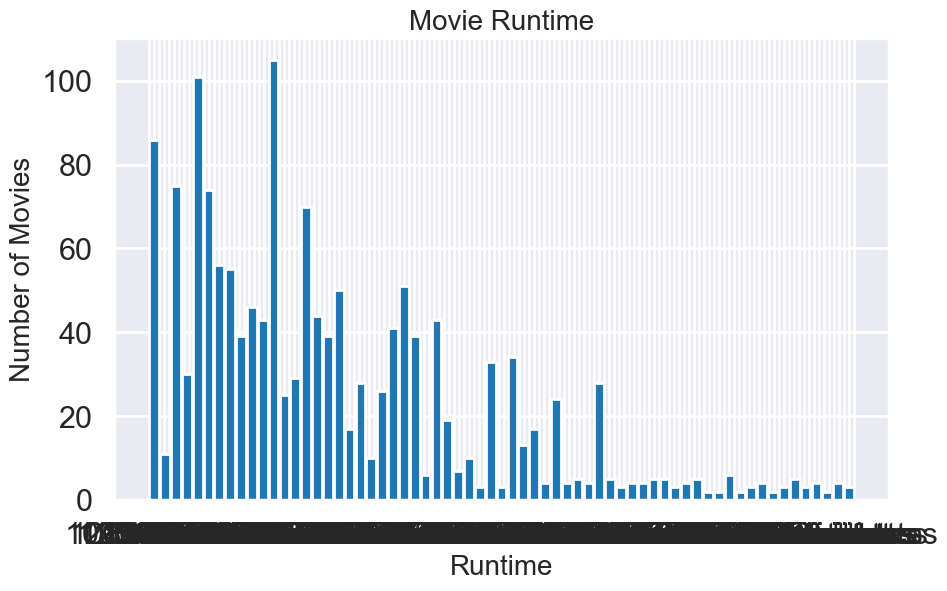

<Figure size 640x480 with 0 Axes>

In [44]:
#Plot to see runtime
plt.figure(figsize=(10,6), dpi = 100)
plt.xlabel('Runtime', fontsize = 20) 
plt.ylabel('Number of Movies', fontsize=20)
plt.title('Movie Runtime', fontsize=20)
plt.hist(info['runtime'], rwidth = 0.9, bins =65)
plt.show()
plt.savefig('images/runtime.jpg')

In [10]:
#murging data
bom_movies = pd.merge(bom_gross_df,movies, left_on='title', right_on='original_title', how='left',suffixes=('','_y'))

In [11]:
#Droping unnecessary columns
bom_movies.drop([ 'studio','year',
       'Unnamed: 0','id','title_y'  ], axis=1, inplace=True)
bom_movies

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0
1,Alice in Wonderland (2010),334200000.0,691300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...
3718,The Quake,6200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3719,Edward II (2018 re-release),4800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3720,El Pacto,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3721,The Swan,2400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(bom_movies.shape)
bom_movies = bom_movies.drop_duplicates(keep='first')
print(bom_movies.shape)

(3723, 10)
(3502, 10)


In [13]:
# replacing all the zeros.
cols = ['domestic_gross', 'foreign_gross','popularity', 'vote_average','vote_count']
bom_movies[cols] = bom_movies[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
bom_movies.dropna(subset=cols, inplace=True)
bom_movies.shape

(1404, 10)

In [14]:
# Changing the release_date column to DateTime column

bom_movies.release_date = pd.to_datetime(bom_movies['release_date'])
bom_movies.head()

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0
5,The Twilight Saga: Eclipse,300500000.0,398000000,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909.0
6,Iron Man 2,312400000.0,311500000,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368.0


In [15]:
#taking a year from every data 
bom_movies['release_year'] = bom_movies['release_date'].dt.year
bom_movies.head()

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,release_year
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0,2010
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,2010
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0,2010
5,The Twilight Saga: Eclipse,300500000.0,398000000,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909.0,2010
6,Iron Man 2,312400000.0,311500000,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368.0,2010


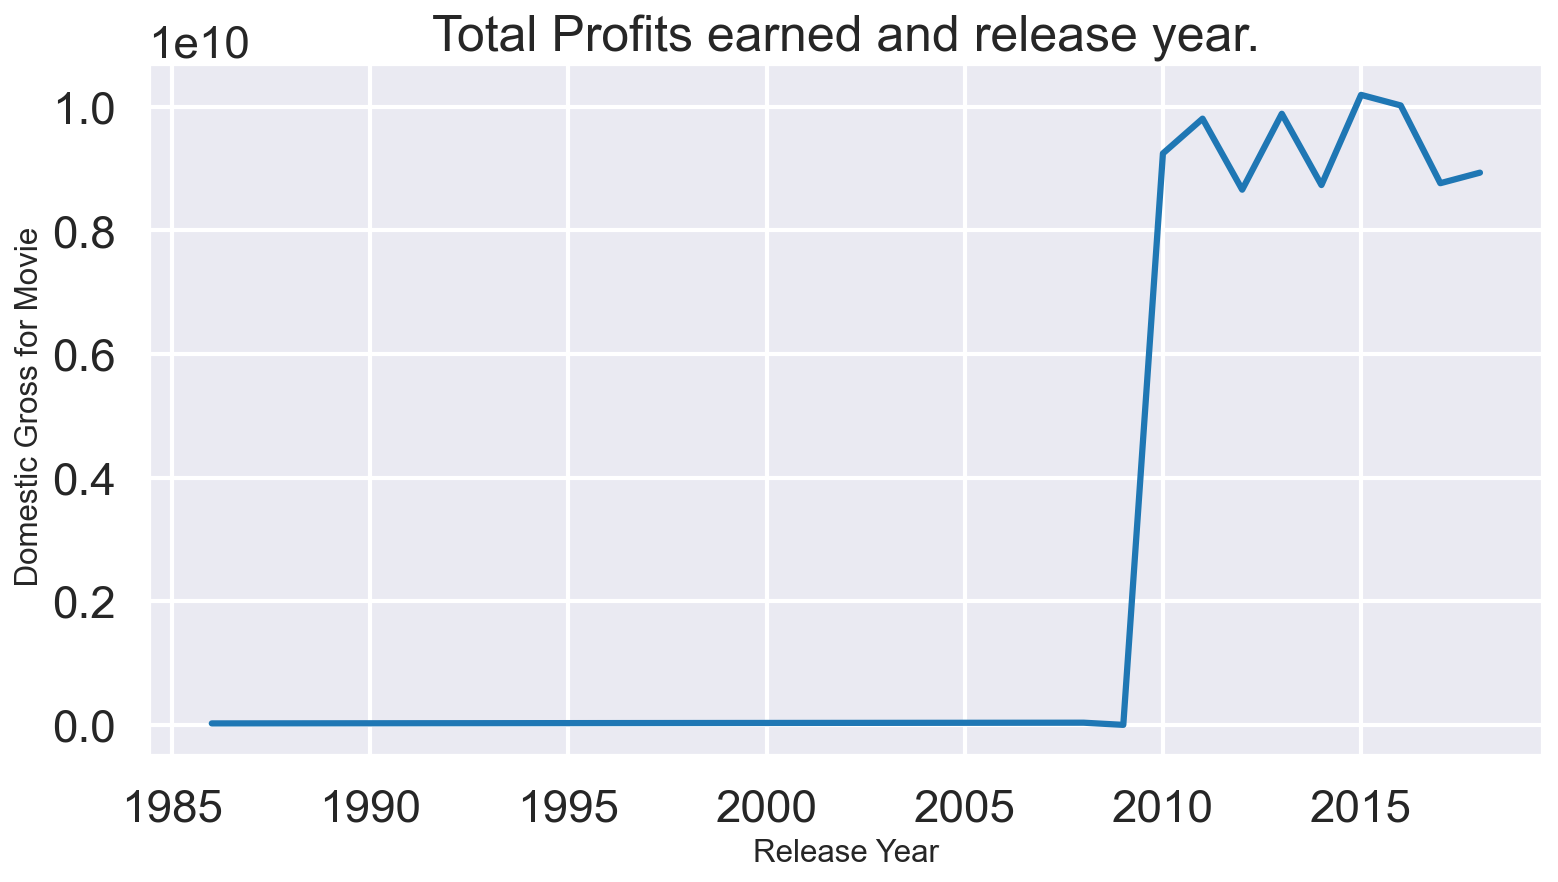

<Figure size 640x480 with 0 Axes>

In [16]:
#most profitable year 
domestic_gross_year = bom_movies.groupby('release_year')['domestic_gross'].sum()
plt.figure(figsize=(12,6), dpi = 150)

plt.xlabel('Release Year', fontsize = 15)
plt.ylabel(' Domestic Gross for Movie', fontsize = 15)
plt.title('Total Profits earned and release year.')
plt.plot(domestic_gross_year)
plt.show()
plt.savefig('images/protitible_year.jpg')

In [17]:
domestic_gross_year.idxmax()

2015

In [18]:
#movies have profit over $80M 
profit= bom_movies[bom_movies['domestic_gross'] >= 80000000]
profit.index = range(len(profit))
profit.index = profit.index + 1
profit.head(3)

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,release_year
1,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0,2010
2,Inception,292600000.0,535700000,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,2010
3,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0,2010


In [19]:
#checkin top 5 popular movies
popular_movies_df = bom_movies.sort_values(by ='popularity', ascending=False).head()
popular_movies_df

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,release_year
3391,Avengers: Infinity War,678800000.0,"1,369.5","[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948.0,2018
1619,John Wick,43000000.0,45700000,"[28, 53]",en,John Wick,78.123,2014-10-24,7.2,10081.0,2014
1539,The Hobbit: The Battle of the Five Armies,255100000.0,700900000,"[28, 12, 14]",en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,7.3,8392.0,2014
1540,Guardians of the Galaxy,333200000.0,440200000,"[28, 878, 12]",en,Guardians of the Galaxy,49.606,2014-08-01,7.9,17958.0,2014
3047,Blade Runner 2049,92100000.0,167200000,"[878, 28, 53]",en,Blade Runner 2049,48.571,2017-10-06,7.4,6679.0,2017


In [20]:
#movies rated 8 and more
bom_movies[bom_movies['vote_average'] >= 8.0]

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,release_year
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,2010
23,Shutter Island,128000000.0,166800000,"[18, 53, 9648]",en,Shutter Island,18.060,2010-02-18,8.1,12625.0,2010
366,The Help,169700000.0,46900000,[18],en,The Help,12.598,2011-08-10,8.1,3944.0,2011
533,Senna,1600000.0,6600000,[99],en,Senna,7.410,2011-01-21,8.3,437.0,2011
767,Django Unchained,162800000.0,262600000,"[18, 37]",en,Django Unchained,21.260,2012-12-25,8.0,15725.0,2012
925,Delicacy,499000.0,9200000,"[27, 18]",en,Delicacy,0.600,2013-04-20,8.0,1.0,2013
1117,Wagner & Me,37700.0,41000,"[10402, 99]",en,Wagner & Me,0.840,2012-11-02,8.0,2.0,2012
1233,Prisoners,61000000.0,61100000,"[18, 53, 80]",en,Prisoners,14.358,2013-09-21,8.0,5785.0,2013
1336,Paranoia,7400000.0,6400000,"[53, 27]",en,Paranoia,0.600,2016-05-24,10.0,1.0,2016
1547,Interstellar,188000000.0,489400000,"[12, 18, 878]",en,Interstellar,28.440,2014-11-05,8.2,18597.0,2014


In [21]:
#Language 
bom_movies['original_language'].value_counts()

en    1358
fr      11
hi       9
es       7
it       2
ko       2
da       2
de       2
nl       2
pt       1
te       1
th       1
xx       1
cs       1
bs       1
el       1
ro       1
zh       1
Name: original_language, dtype: int64

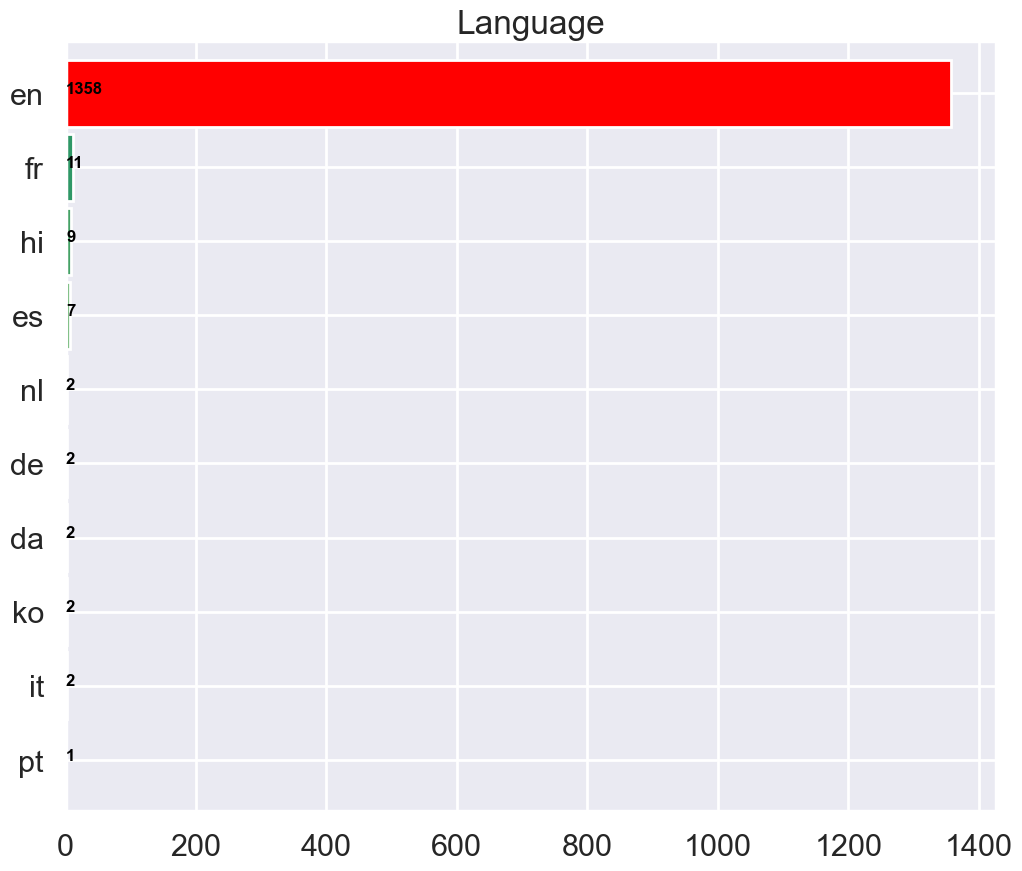

<Figure size 640x480 with 0 Axes>

In [22]:
bom_movies['original_language']=bom_movies['original_language'].str.strip('[]').str.replace(' ','').str.replace("'",'')
bom_movies['original_language']=bom_movies['original_language'].str.split(',')

plt.subplots(figsize=(12,10))
list1=[]
for i in bom_movies['original_language']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='black',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Language')
plt.show()
plt.savefig('images/lenguage.jpg')

In [23]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [24]:
#removing commas and dollars signs
budgets['production_budget']=budgets['production_budget'].str.replace(',', '')
budgets['production_budget']=budgets['production_budget'].str.replace('$', '')
budgets['production_budget']=budgets['production_budget'].astype(int)

/var/folders/3n/2cj5xmpd5xv0c12mtvk3_4hm0000gn/T/ipykernel_18447/3377784623.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets['production_budget']=budgets['production_budget'].str.replace('$', '')


In [25]:
#Average bugdget for movie
budgets['production_budget'].mean()

31587757.0965064

In [26]:
budgets['worldwide_gross']=budgets['worldwide_gross'].str.replace(',', '')
budgets['worldwide_gross']=budgets['worldwide_gross'].str.replace('$', '')
budgets['worldwide_gross']=budgets['worldwide_gross'].astype(int)

/var/folders/3n/2cj5xmpd5xv0c12mtvk3_4hm0000gn/T/ipykernel_18447/4185220598.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets['worldwide_gross']=budgets['worldwide_gross'].str.replace('$', '')


In [27]:
budgets['worldwide_gross'].mean()

91487460.90643376

In [28]:
budgets['domestic_gross']=budgets['domestic_gross'].str.replace(',', '')
budgets['domestic_gross']=budgets['domestic_gross'].str.replace('$', '')
budgets['domestic_gross']=budgets['domestic_gross'].astype(int)

/var/folders/3n/2cj5xmpd5xv0c12mtvk3_4hm0000gn/T/ipykernel_18447/2146435428.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets['domestic_gross']=budgets['domestic_gross'].str.replace('$', '')


In [29]:
budgets['domestic_gross'].mean()

41873326.867001034

In [30]:
info_df['genre'][0].split('|')

['Action and Adventure', 'Classics', 'Drama']

In [31]:
bom_movies['genre_ids']=bom_movies['genre_ids'].str.strip('[]').str.replace("'",'').str.replace("'",'')

bom_movies['genre_ids']=bom_movies['genre_ids'].str.split(',')

bom_movies.head()

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,release_year
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",[en],Toy Story 3,24.445,2010-06-17,7.7,8340.0,2010
3,Inception,292600000.0,535700000,"[28, 878, 12]",[en],Inception,27.920,2010-07-16,8.3,22186.0,2010
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",[en],Shrek Forever After,15.041,2010-05-16,6.1,3843.0,2010
5,The Twilight Saga: Eclipse,300500000.0,398000000,"[12, 14, 18, 10749]",[en],The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909.0,2010
6,Iron Man 2,312400000.0,311500000,"[12, 28, 878]",[en],Iron Man 2,28.515,2010-05-07,6.8,12368.0,2010


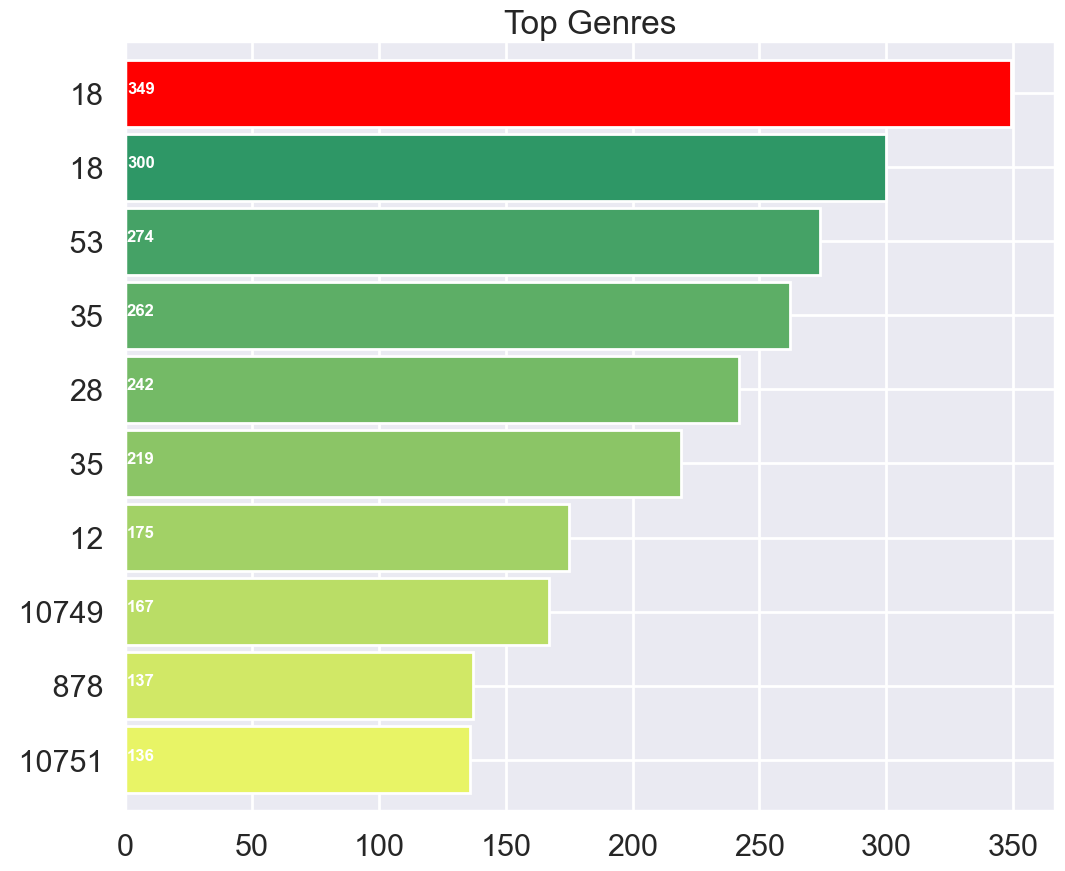

<Figure size 640x480 with 0 Axes>

In [32]:
#Plot to see top Genres 
plt.subplots(figsize=(12,10))
list1=[]
for i in bom_movies['genre_ids']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()
plt.savefig('images/top_genres.jpg')

`sns.lmplot` was giving an error referring to the 'runtime' comumns DataType. to slove this problam I searched the following: 

`"sns.lmplot" UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'` 

This lead me to this search results found [here](https://stackoverflow.com/questions/75546110/error-on-seaborn-lmplot-when-passing-dataframe-data-due-to-dtypeo-error-exc). 

In [62]:
#solved UFuncTypeError by converting "runtime" column from int to float 
info_df['runtime'] = info_df['runtime'].astype(float)

In [63]:
info_df.head()

,index,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104.0,NaN
1,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108.0,Entertainment One
2,2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116.0,NaN
3,3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128.0,NaN
4,4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200.0,NaN


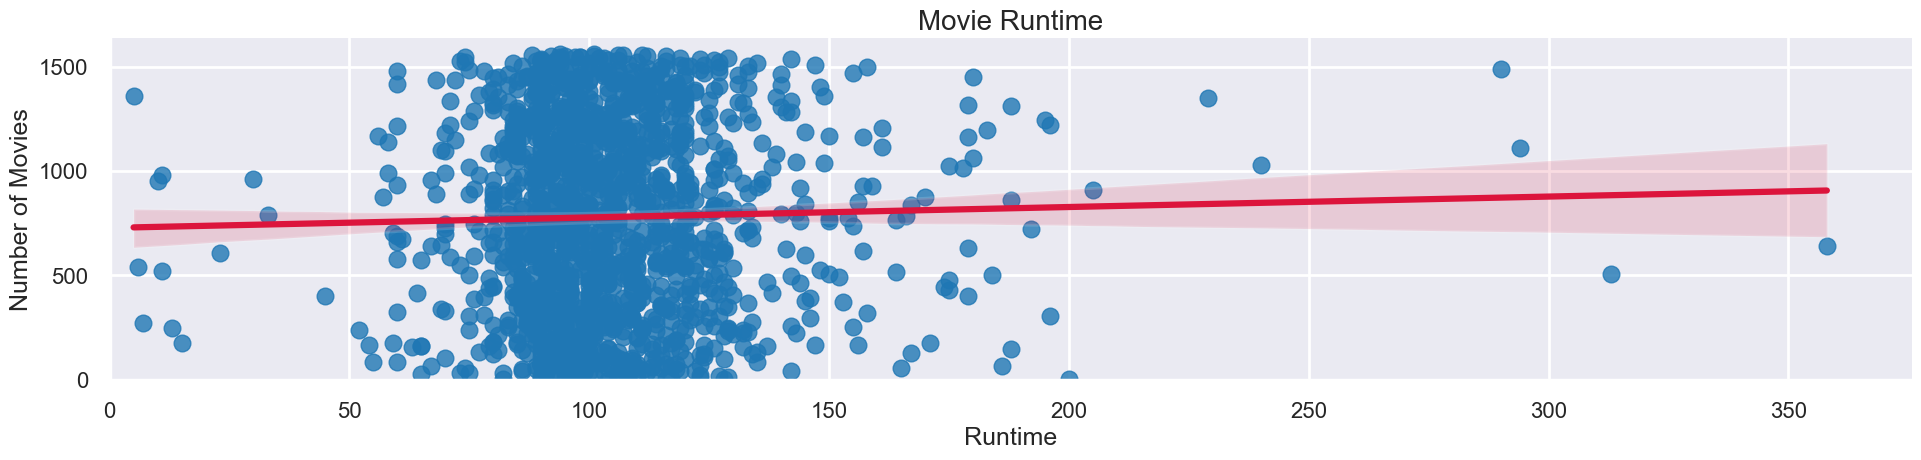

In [64]:
sns.lmplot( x='runtime',y='index' , data=info_df, aspect=4, line_kws={'color': 'crimson'})
plt.title('Movie Runtime', fontsize=20)
plt.xlabel('Runtime', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,None)
plt.xlim(0, None);


# Conclusions

After doing this data analysis I came out with some very interesting facts about movies. I found out what the average budget, duration,language,genre should be. What are the top 5 popular movies, what made them successful. I analyze the  top 3 most profitable movies and year in this dataset. All this information helped me to make recommendations to my client what criteria should Microsoft follow to make a successful movie.
  If follow all the recommendations, the average worldwide gross should be  around 91 million dollars and domestic profit around 41 million dollars.


# Limitations

I wish I had some more information about actors so I could decide who should be in the movie. Because as we know actors are a very important criteria of the movie.

# Recommendations

To make a successful movie the average budget must be around  31 million dollars.
Average duration of the movie must be around 104 minutes
The language has to be English
Genre must be : Action, Adventure, Comedy ,Drama,Family,Fiction or Triller.

# Next Steps

My next step in the development of this topic would be finding more information about directors and writers.